<a href="https://colab.research.google.com/github/Diogoa83/Estatisticas-e-Analises-Descritivas/blob/main/Vendas_Oline_Analise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

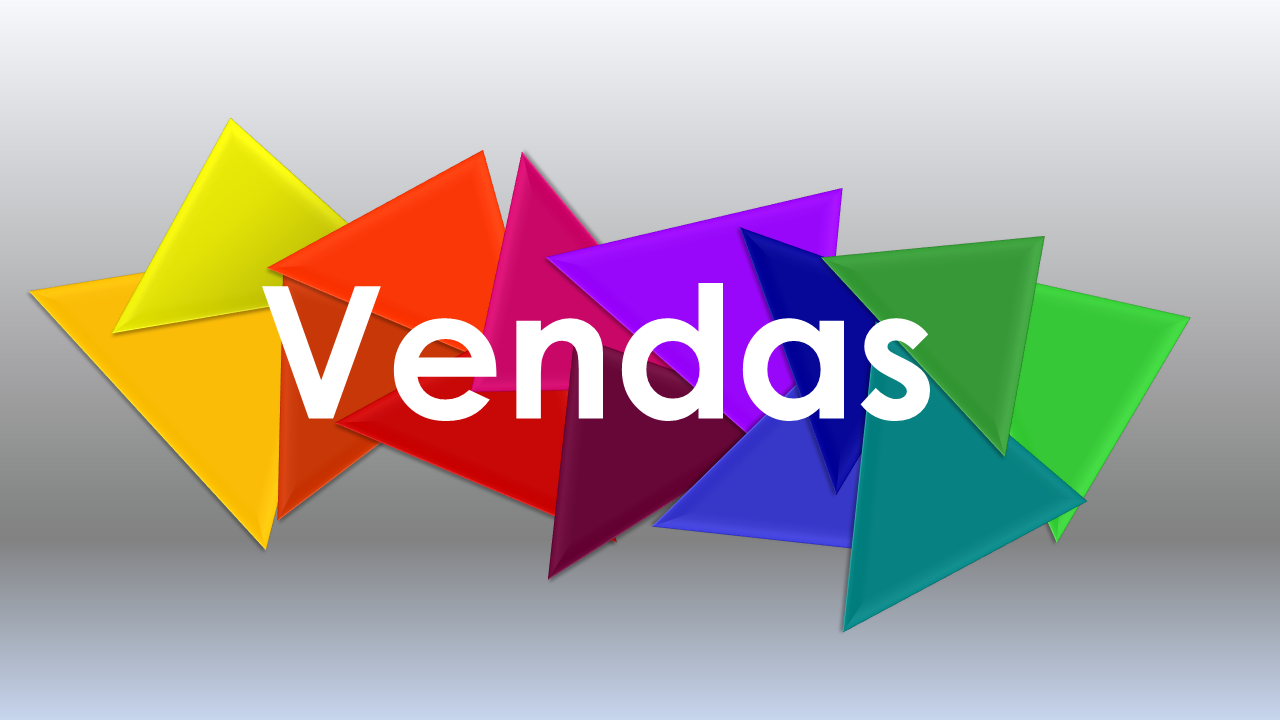

Fonte: https://archive.ics.uci.edu/ml/datasets/Online+Retail#

Elaboração: Diogo Antonio

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [44]:


df = pd.read_excel('/content/Online Retail.xlsx')


In [45]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [46]:
print(df.describe())


            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [47]:
print(df.dtypes)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


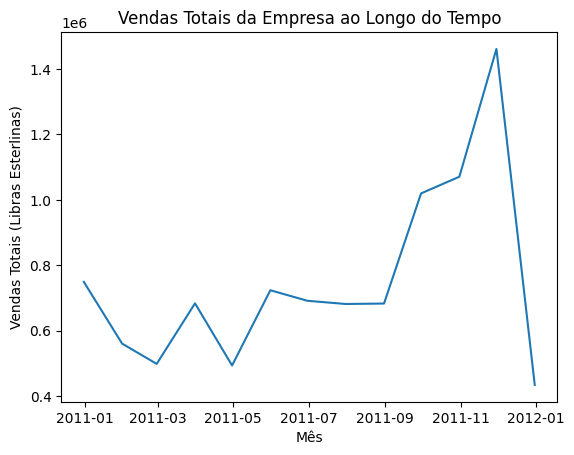

In [48]:

# cria coluna com valor total de cada transação
df['Valor Total'] = df['Quantity'] * df['UnitPrice']

# agrupa as vendas por mês e calcula a soma das vendas totais em cada mês
sales_by_month = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Valor Total'].sum()

# plota o gráfico de linha das vendas totais por mês
plt.plot(sales_by_month.index, sales_by_month.values)
plt.xlabel('Mês')
plt.ylabel('Vendas Totais (Libras Esterlinas)')
plt.title('Vendas Totais da Empresa ao Longo do Tempo')
plt.show()


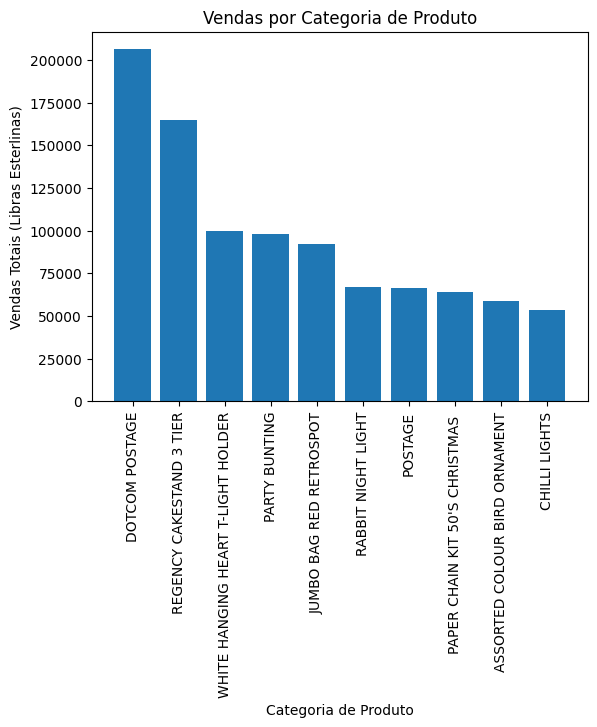

In [49]:
# agrupa as vendas por categoria de produto e calcula a soma das vendas em cada categoria
sales_by_category = df.groupby('Description')['Valor Total'].sum().sort_values(ascending=False)[:10]

# plota o gráfico de barras das vendas por categoria
plt.bar(sales_by_category.index, sales_by_category.values)
plt.xticks(rotation=90)
plt.xlabel('Categoria de Produto')
plt.ylabel('Vendas Totais (Libras Esterlinas)')
plt.title('Vendas por Categoria de Produto')
plt.show()

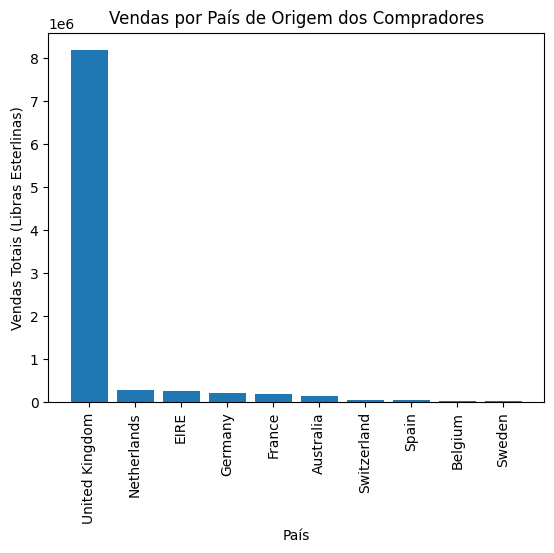

In [50]:
# agrupa as vendas por país e calcula a soma das vendas em cada país
sales_by_country = df.groupby('Country')['Valor Total'].sum().sort_values(ascending=False)[:10]

# plota o gráfico de barras das vendas por país
plt.bar(sales_by_country.index, sales_by_country.values)
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Vendas Totais (Libras Esterlinas)')
plt.title('Vendas por País de Origem dos Compradores')
plt.show()

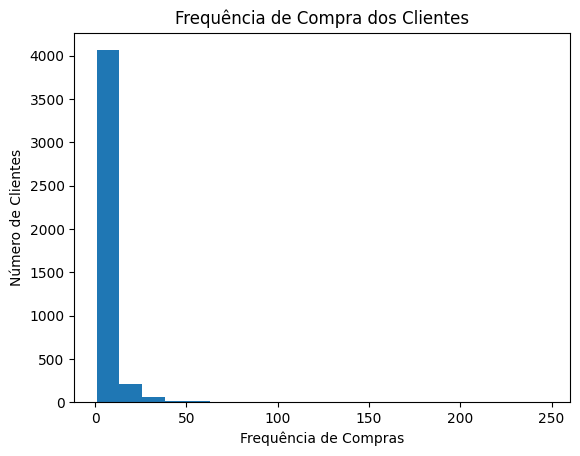

In [51]:
# agrupa as vendas por cliente e calcula a frequência de compras de cada um
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

# plota o histograma da frequência de compras
plt.hist(frequency, bins=20)
plt.xlabel('Frequência de Compras')
plt.ylabel('Número de Clientes')
plt.title('Frequência de Compra dos Clientes')
plt.show()

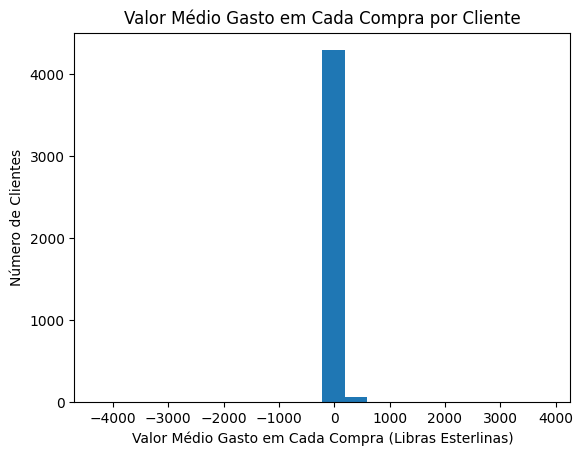

In [52]:

# agrupa as vendas por cliente e calcula o valor médio gasto em cada compra de cada um
mean_value = df.groupby('CustomerID')['Valor Total'].mean()

# plota o histograma do valor médio gasto em cada compra
plt.hist(mean_value, bins=20)
plt.xlabel('Valor Médio Gasto em Cada Compra (Libras Esterlinas)')
plt.ylabel('Número de Clientes')
plt.title('Valor Médio Gasto em Cada Compra por Cliente')
plt.show()

In [53]:
# Agrupa as transações pela coluna InvoiceNo e soma a quantidade de produtos em cada transação
items_per_transaction = df.groupby('InvoiceNo')['Quantity'].sum()

# Imprime o resultado
print(items_per_transaction)

InvoiceNo
536365        40
536366        12
536367        83
536368        15
536369         3
           ...  
C581484   -80995
C581490      -23
C581499       -1
C581568       -5
C581569       -6
Name: Quantity, Length: 25900, dtype: int64


In [54]:
# Calcula a média da quantidade de produtos em cada transação
mean_items_per_transaction = df.groupby('InvoiceNo')['Quantity'].mean().mean()

# Imprime o resultado
print('A quantidade média de itens comprada por transação é: {:.2f}'.format(mean_items_per_transaction))

A quantidade média de itens comprada por transação é: 12.85


<ipython-input-55-af70552b640b>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



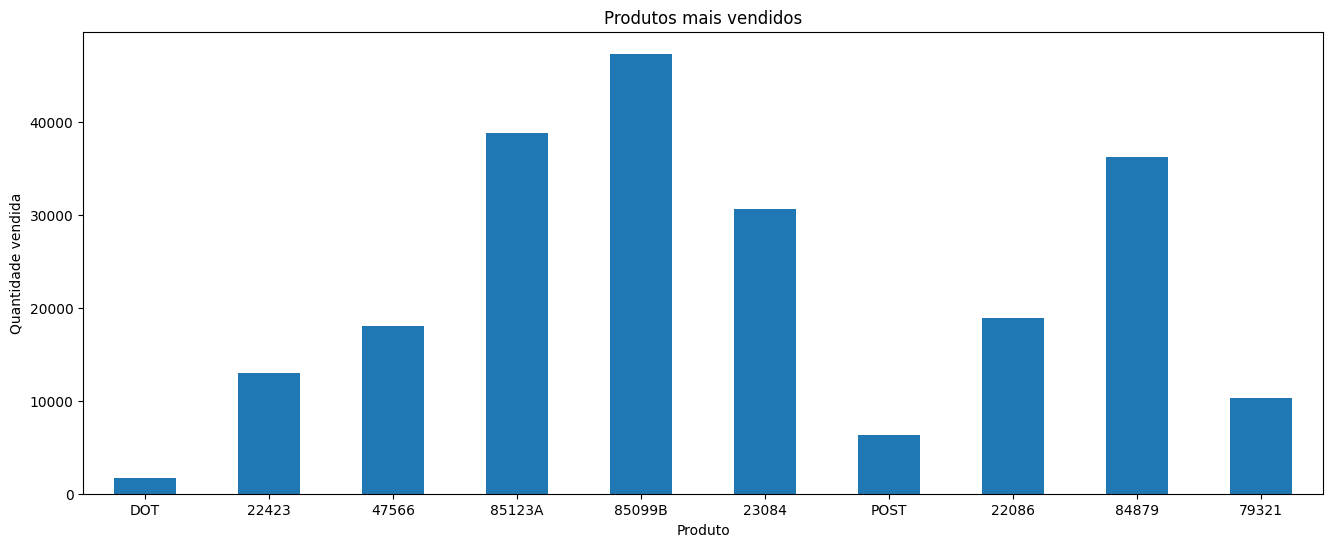

In [55]:

# Calcula o lucro de cada transação
df['Profit'] = df['UnitPrice'] * df['Quantity']

# Agrupa os produtos pelo seu código e soma a quantidade vendida e o lucro gerado
products_sales = df.groupby('StockCode')['Quantity', 'Profit'].sum()

# Ordena os produtos pelo lucro gerado
products_sales = products_sales.sort_values(by='Profit', ascending=False)

# Seleciona os 10 produtos mais vendidos
top10_sales = products_sales[:10]

# Plota um gráfico de barras para a quantidade de vendas de cada produto
plt.figure(figsize=(16, 6))
top10_sales['Quantity'].plot(kind='bar', rot=0)
plt.title('Produtos mais vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade vendida')
plt.show()




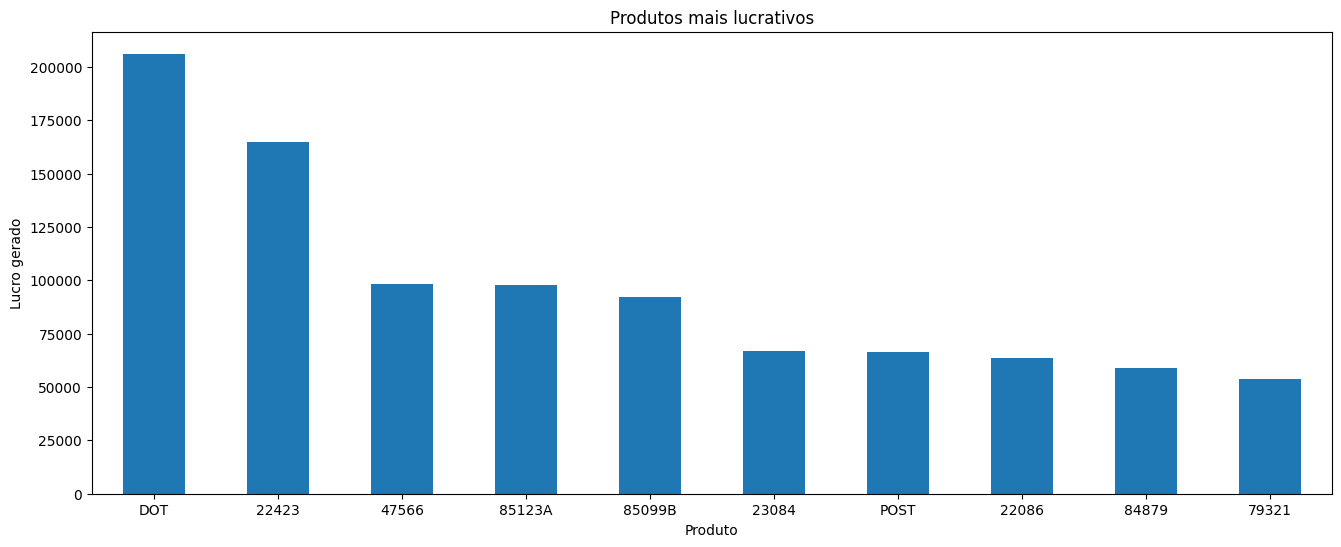

In [56]:
# Plota um gráfico de barras para o lucro gerado por cada produto
plt.figure(figsize=(16, 6))
top10_sales['Profit'].plot(kind='bar', rot=0)
plt.title('Produtos mais lucrativos')
plt.xlabel('Produto')
plt.ylabel('Lucro gerado')
plt.show()



<ipython-input-57-10199d4ad6c0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



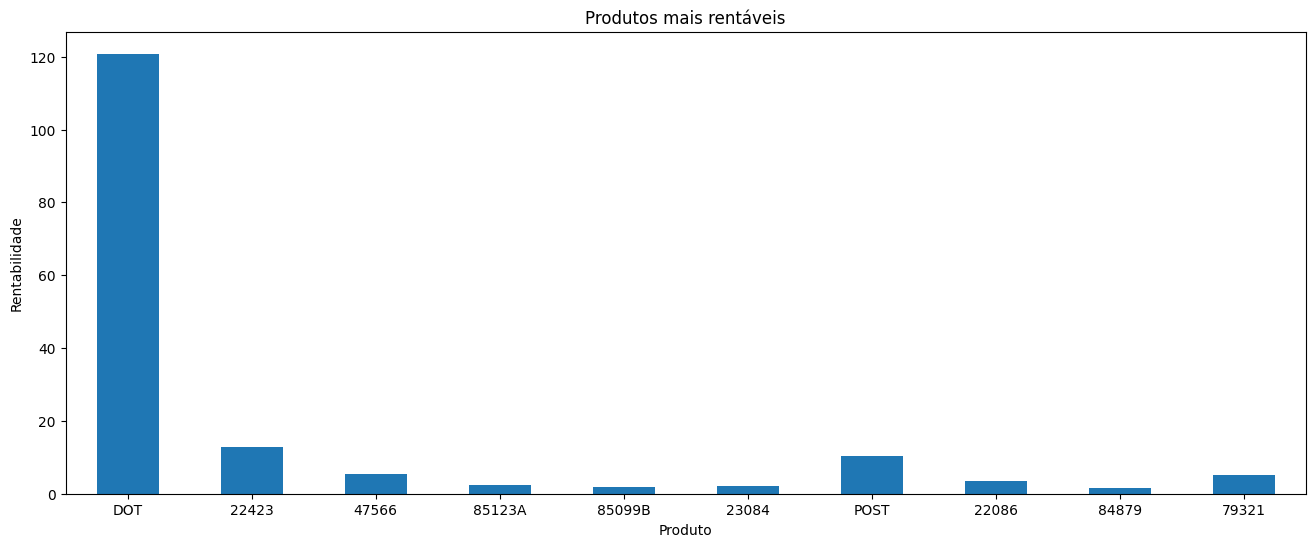

In [57]:
# Calcula a rentabilidade de cada produto (lucro / quantidade vendida)
top10_sales['Profitability'] = top10_sales['Profit'] / top10_sales['Quantity']

# Plota um gráfico de barras para a rentabilidade de cada produto
plt.figure(figsize=(16, 6))
top10_sales['Profitability'].plot(kind='bar', rot=0)
plt.title('Produtos mais rentáveis')
plt.xlabel('Produto')
plt.ylabel('Rentabilidade')
plt.show()

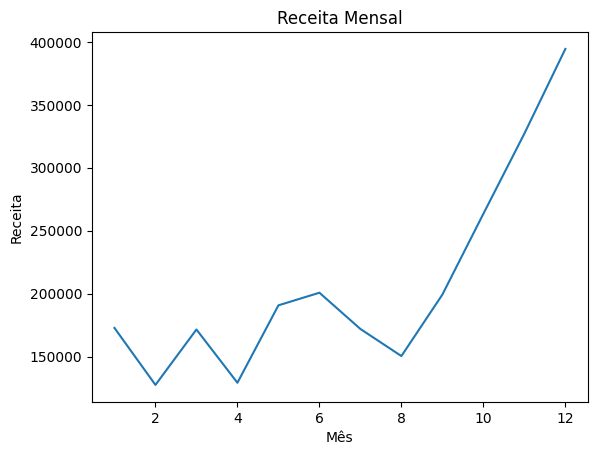

In [58]:

# Converte a coluna de datas para o formato de data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Agrupa as vendas por mês e calcula a receita total em cada mês
monthly_sales = df.groupby(df['InvoiceDate'].dt.month).sum()['UnitPrice']

# Plota um gráfico de linha para visualizar a variação da receita ao longo do ano
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Receita Mensal')
plt.show()


In [59]:


# Converte a coluna 'InvoiceDate' para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extrai a hora de cada timestamp
df['Hour'] = df['InvoiceDate'].dt.hour


In [60]:
import plotly.express as px

# Agrupa as vendas por hora
sales_by_hour = df.groupby('Hour').count()['InvoiceNo']

# Plota o histograma com as informações de vendas
fig = px.bar(x=sales_by_hour.index, y=sales_by_hour.values, labels={'x': 'Hora do dia', 'y': 'Vendas'}, 
             title='Distribuição das vendas ao longo do dia')
fig.show()


# FIM